# This is homework 6 of Machine Learning
### Tree-Based Method and SMOTE
#### William Lu
#### 7424831487
#### WilliamLu1999

In [49]:
### set up and download
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import glob
import os
import math
from sklearn.impute import SimpleImputer

##### 1. (a)(b) Data Preparation

i. Imputation techniques such as mean/median imputation, mode, arbitraty value, end of tail imputations are used for numerical values. For categorical values, adding a 'missing' category or frequent category imputation are often used. Imputation using KNN, MICE, and Datawig.
reference: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [46]:
df_test_pre = pd.read_csv('../data/aps_failure_test_set.csv')
df_train_pre = pd.read_csv('../data/aps_failure_training_set.csv')
df_pre = pd.concat([df_train_pre,df_test_pre])
columns_ = df_pre.columns

In [75]:
df_test_pre

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [51]:
df_pre = df_pre.replace('na', np.nan)
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_pre.iloc[:,1:])
imputed_df = imp_mean.transform(df_pre.iloc[:,1:])
# we use the most frequent imputation.

In [57]:
columns_[1:]

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)

In [73]:
df_pre_=pd.DataFrame(df_pre['class'])

In [71]:
imputed_df_= pd.DataFrame(imputed_df,columns = columns_[1:])
imputed_df_ = imputed_df_.reset_index(drop=True)
df_pre_ = df_pre_.reset_index(drop=True)
df = pd.concat([df_pre_, imputed_df_], axis=1)
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852.0,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,neg,18.0,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,neg,79636.0,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,neg,110.0,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [79]:
df_train = df.iloc[0:60000,::]
df_test = df.iloc[60000:,::]

##### b(ii) calculate CV = s/m

In [81]:
std=list(df.iloc[:,1:].std())
mean=list(df.iloc[:,1:].mean())
CV = [s/m for s,m in zip(std, mean)]
CV

[4.328607835435785,
 2.178272593944041,
 2.1676533085378886,
 206.72149958176453,
 22.293670429503308,
 18.209015502890768,
 91.46065359583645,
 42.08434252956986,
 17.625908567425444,
 8.753299520356666,
 5.475116255434917,
 2.9642299310403146,
 2.3525878821684465,
 2.8124979751566856,
 6.274980079892739,
 32.16705734053676,
 2.3155400947419187,
 18.506308128781928,
 43.14447956358556,
 78.62298773590766,
 9.11199122164582,
 9.067195453929418,
 2.2542266522583447,
 2.2761144767667703,
 3.0858848873966314,
 2.853471317417596,
 10.569202321811572,
 113.88275538316807,
 23.18705992823811,
 86.0856375114368,
 5.7304853575294405,
 3.8590349934226182,
 40.902518755773826,
 49.248634585265535,
 38.34231917467728,
 28.33003562078319,
 33.040131957282725,
 12.009060553563613,
 3.021921429515055,
 3.2498953482638955,
 3.943781265164212,
 77.46110130112072,
 9.019869597830489,
 7.3749671271994535,
 12.050427803801705,
 7.565569169064627,
 2.8378149469062866,
 3.066649109666736,
 8.70440641505165

##### b(iii) Correlation matrix

In [82]:
matrix = df.corr()
matrix

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019725,-0.011658,-0.000541,0.025795,0.035994,0.011682,0.076378,0.195161,0.307443,...,0.414125,0.419912,0.409659,0.419780,0.425679,0.356969,0.259668,0.133764,0.006688,0.010330
ab_000,0.019725,1.000000,-0.010898,0.000066,0.024869,0.043276,0.000590,0.006547,0.023484,0.035696,...,0.025161,0.037052,0.028766,0.034201,0.023921,0.013598,0.002371,0.000506,0.046897,0.075683
ac_000,-0.011658,-0.010898,1.000000,-0.002030,-0.004769,-0.010612,0.015534,-0.002333,-0.009439,-0.022889,...,-0.009808,-0.006437,-0.007962,-0.008115,-0.014680,-0.018631,0.010435,0.017293,-0.006191,0.015826
ad_000,-0.000541,0.000066,-0.002030,1.000000,-0.000195,-0.000236,-0.000038,-0.000034,-0.000093,-0.000223,...,-0.000883,-0.000921,-0.000908,-0.000730,-0.000745,-0.000462,-0.000794,-0.000500,-0.000082,-0.000091
ae_000,0.025795,0.024869,-0.004769,-0.000195,1.000000,0.829986,-0.000441,-0.000609,0.001948,0.020678,...,0.012751,0.019441,0.012847,0.026437,0.066533,0.036619,-0.008393,-0.006952,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013598,-0.018631,-0.000462,0.036619,0.046482,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227098,0.063065,-0.000309,0.000946
ee_008,0.259668,0.002371,0.010435,-0.000794,-0.008393,-0.010843,0.000067,0.005353,0.009109,0.020684,...,0.442532,0.470574,0.448390,0.394020,0.365686,0.227098,1.000000,0.690147,-0.005173,-0.001950
ee_009,0.133764,0.000506,0.017293,-0.000500,-0.006952,-0.008539,-0.001103,-0.003540,-0.009089,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003168,-0.001059
ef_000,0.006688,0.046897,-0.006191,-0.000082,0.063587,0.093474,-0.000076,0.001140,0.005625,0.011036,...,0.003718,0.010177,0.002989,0.026924,0.005298,-0.000309,-0.005173,-0.003168,1.000000,0.222579


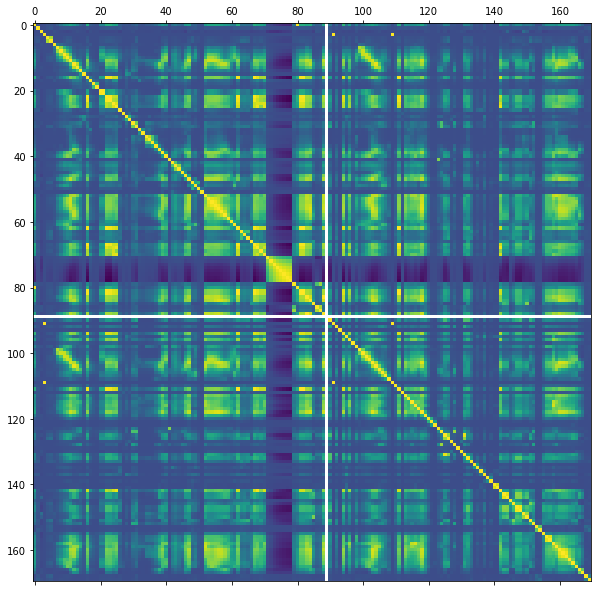

In [104]:
plt.figure(figsize=(10,10))
plt.matshow(matrix,fignum=1)
plt.show()

##### b(iv) Correlation matrix

In [91]:
import heapq
num = int(170**(1/2))
feature_index=heapq.nlargest(num, range(len(CV)), CV.__getitem__)
feature_index

[91, 109, 3, 122, 138, 27, 136, 134, 6, 29, 19, 51, 41]

In [102]:
names = matrix.columns[feature_index]
names

Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000',
       'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009'],
      dtype='object')

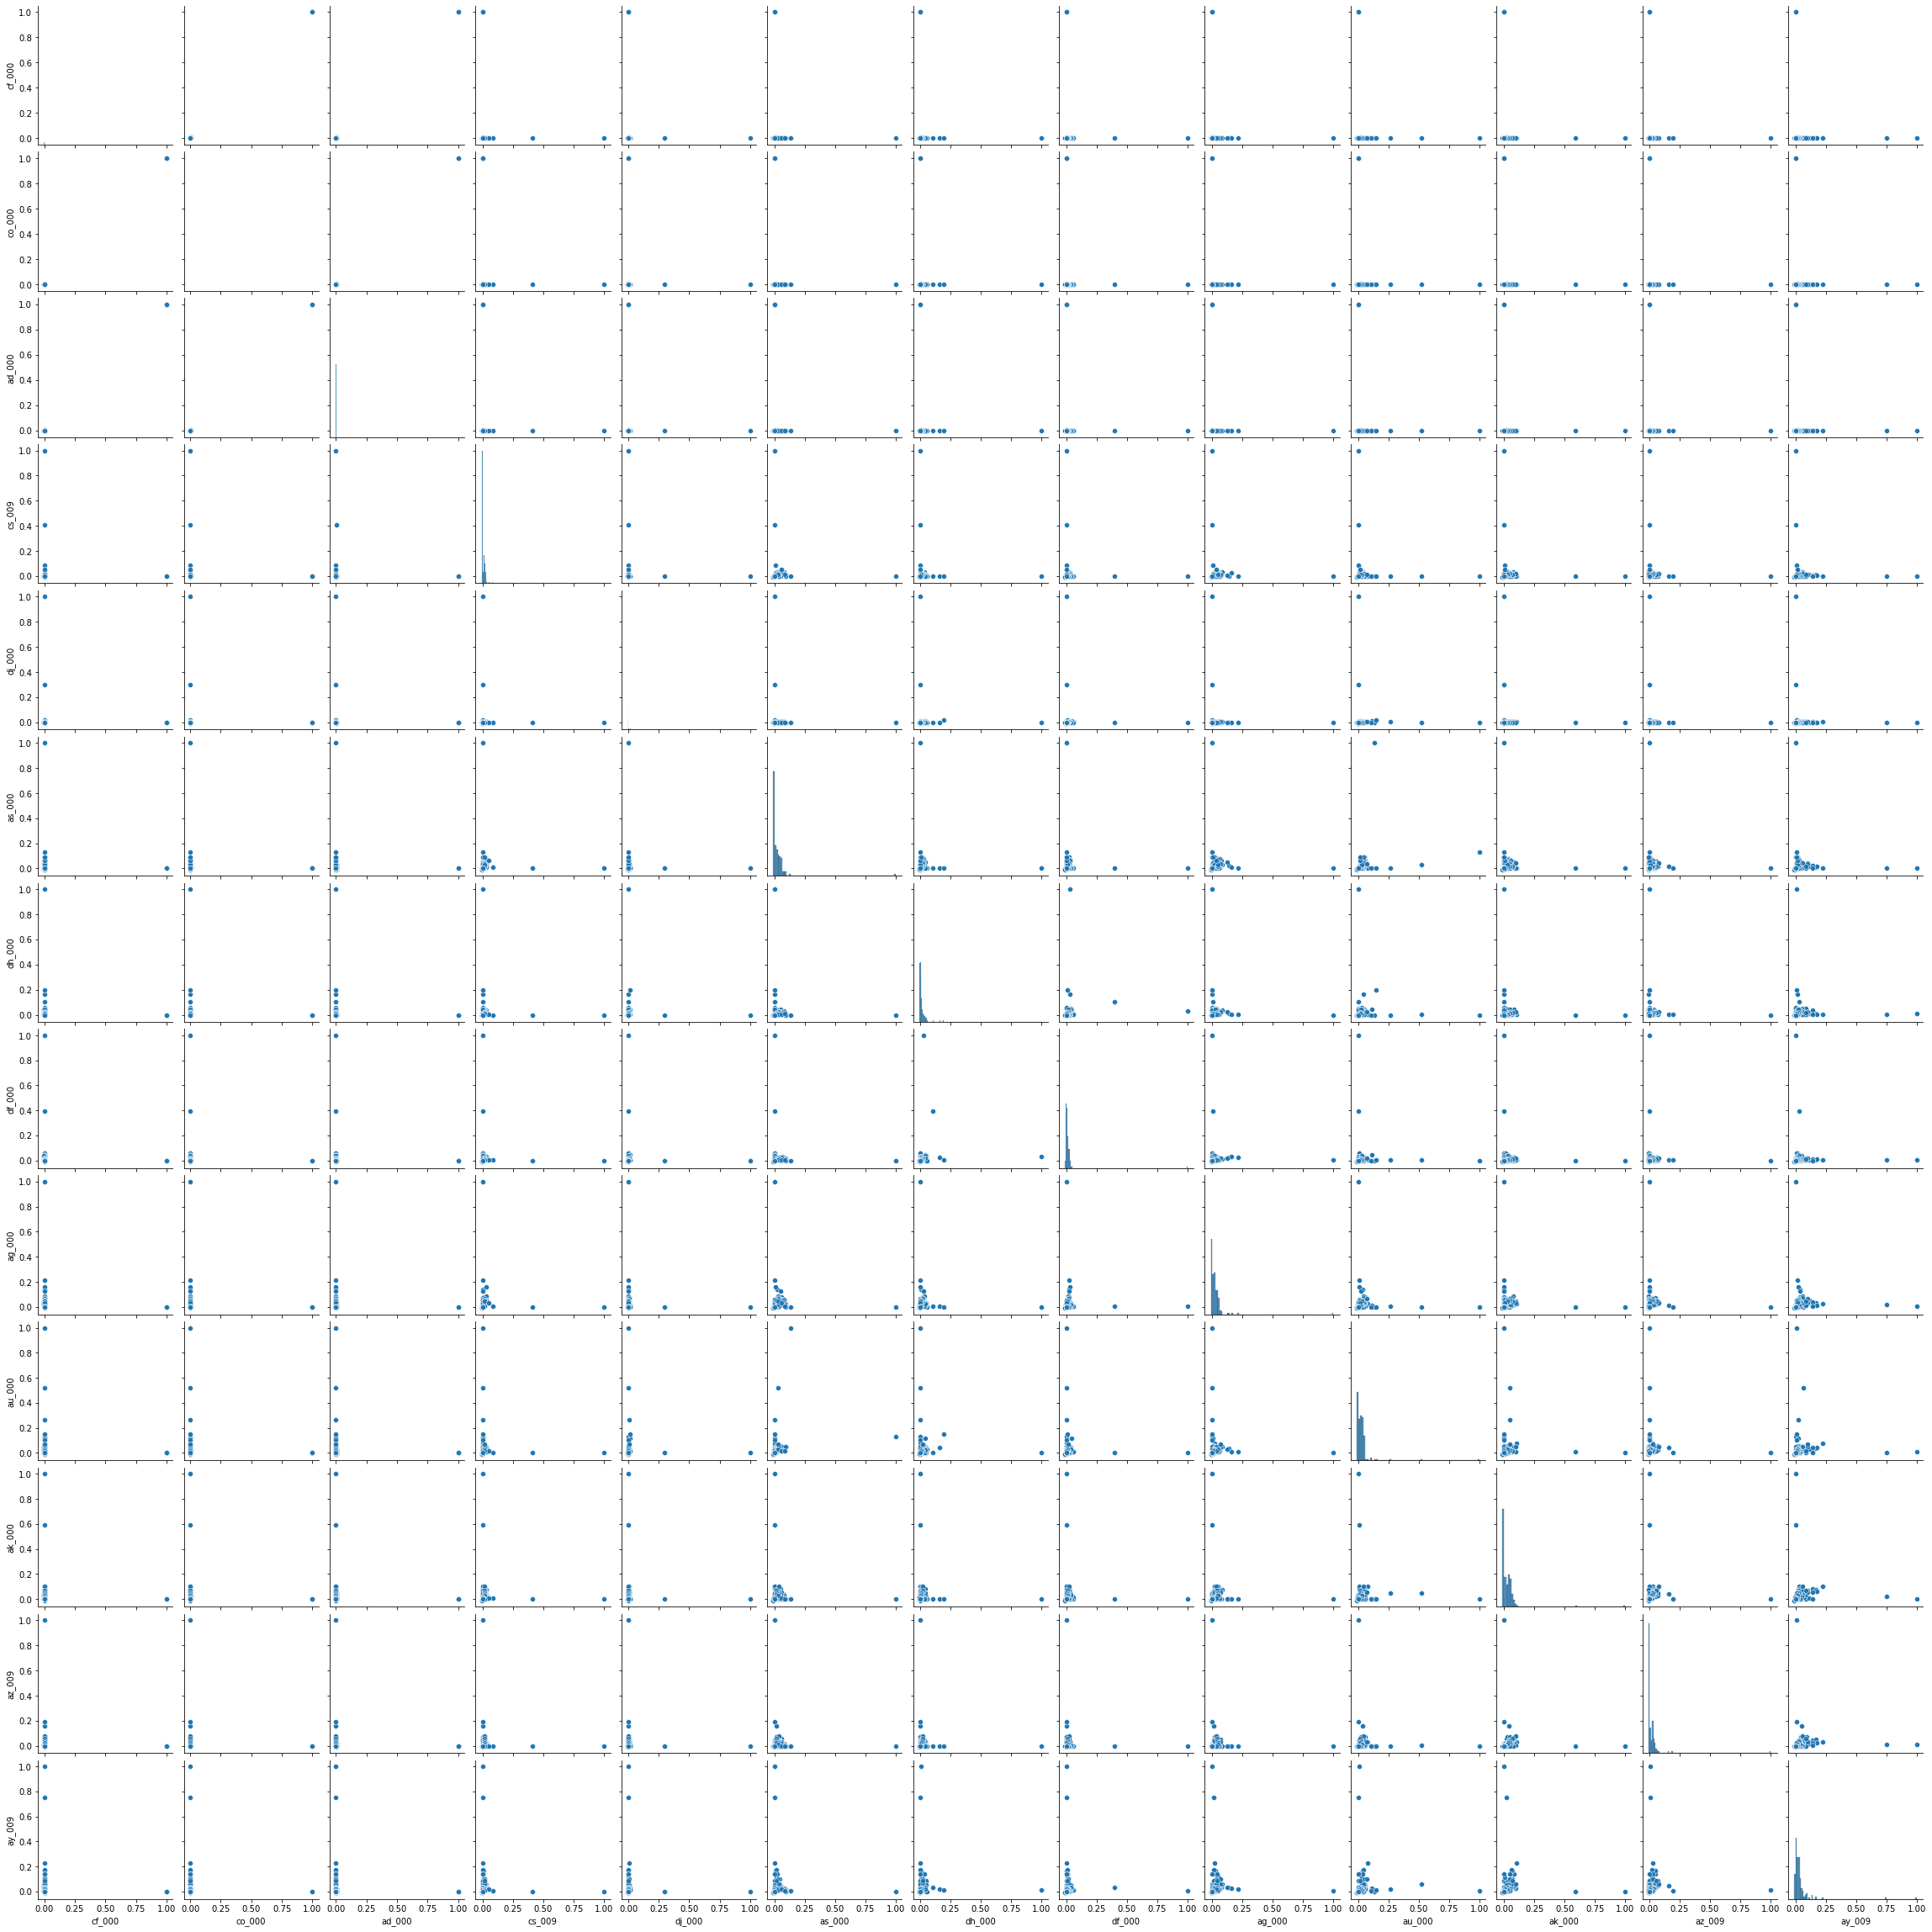

In [105]:
# creating a pairplot for each column
sns.pairplot(matrix[names])

Text(0.5, 0, 'Column Names')

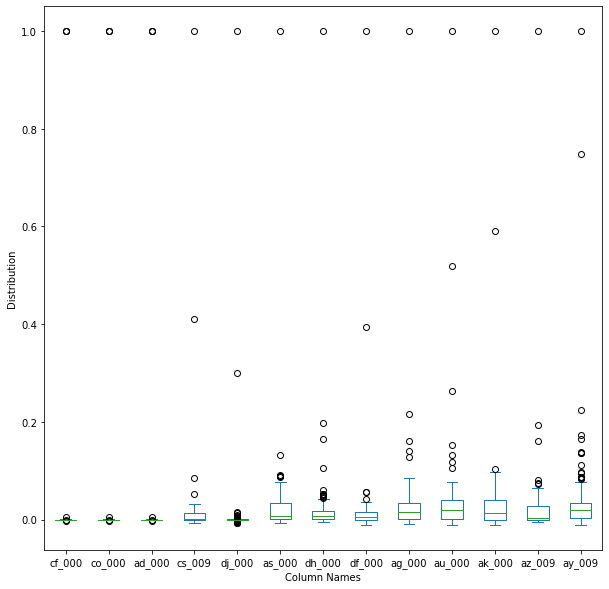

In [118]:
# creating boxplots for each column now
bplot = matrix[names].plot(kind='box',figsize=(10,10))
bplot.set_ylabel('Distribution')
bplot.set_xlabel('Column Names')

##### b(v) determine the number of positive and negative

In [113]:
pos_num = df['class'].value_counts()['pos']
neg_num = df['class'].value_counts()['neg']
print('The number of positive data is: ',pos_num)
print('The number of negative data is: ',neg_num)

The number of positive data is:  1375
The number of negative data is:  74625


There seems to be an imbalance of data.

##### (c) Train a random forest to classify the data. No compensate for the imbalance of the data yet. Confusion matrix, ROC, AUC, and misclassification for training and testing sets and the Out of Bag error estimate.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [128]:
# separating the training data and testing data into X and y
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [144]:
clf = RandomForestClassifier(n_estimators=170,oob_score =True)

In [145]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [146]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9925


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


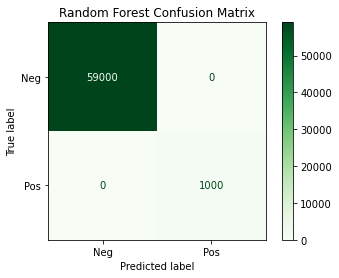

In [153]:
# confusion matrix
# reference: https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(clf, X_train, y_train, display_labels=['Neg', 'Pos'], cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [154]:
# misclassification rate
misrate_train = 0
print('The misclassification rate for the training data set is: ',misrate_train)

The misclassification rate for the training data set is:  0


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


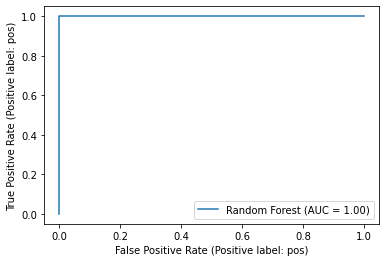

In [149]:
# ROC, AUC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_train, y_train, name = 'Random Forest')

In [150]:
# Out of Bag error estimate
# Notes: Out of Bag error is a way of evaluating the random forest model. It is the average error
# for each calculated using predictions from the tree that does not contain in their bootstrap example
clf.oob_score_

0.9940166666666667

Now we are going to do the same for the test set.

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


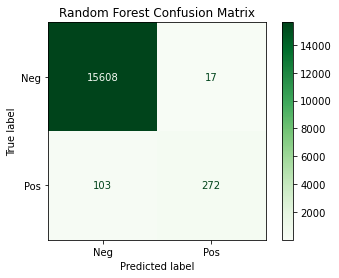

In [155]:
fig_2 = plot_confusion_matrix(clf, X_test, y_test, display_labels=['Neg', 'Pos'], cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [162]:
# misclassification rate
misrate_test = (17+103)/(17+103+272+15608)
print('The misclassification rate for the testing data set is: ',misrate_test)

The misclassification rate for the testing data set is:  0.0075


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


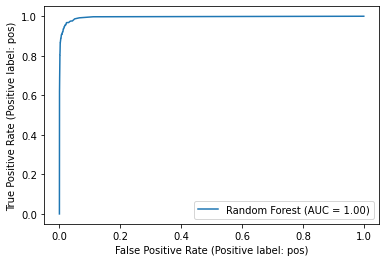

In [157]:
# ROC, AUC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test, name = 'Random Forest')

In [159]:
oob_estimate =1 - clf.oob_score_
oob_estimate

0.0059833333333333405

From the out of bag estimate, which is 0.0059, and misclassification error rate for the test set, which is 0.0075, we can see that the out of bag error estimate is lower.

##### (d) How is class imbalance addressed in random forests? Repeat (c).

Imbalance is addressed through cost-sensitive learning and sampling.
reference: https://stats.stackexchange.com/questions/340854/random-forest-for-imbalanced-data
https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
Hence, I decide to use sampling to solve this issue. In other words, Balanced Random Forest.

In [160]:
from imblearn.ensemble import BalancedRandomForestClassifier
bclf = BalancedRandomForestClassifier(n_estimators=170, random_state=2,oob_score =True)

In [161]:
bclf.fit(X_train,y_train)
y_pred_b = bclf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_b))

/Users/William/opt/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:683: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Accuracy: 0.948125


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


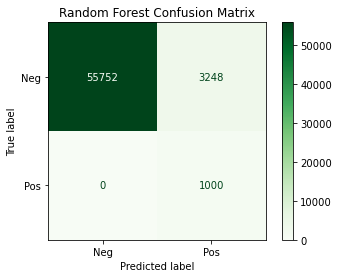

In [163]:
fig2 = plot_confusion_matrix(bclf, X_train, y_train, display_labels=['Neg', 'Pos'], cmap='Greens')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

In [167]:
misrate_train_b = 3248/(1000+3248+55752)
print('The misclassification rate for the training data set is: ',misrate_train_b)

The misclassification rate for the training data set is:  0.05413333333333333


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


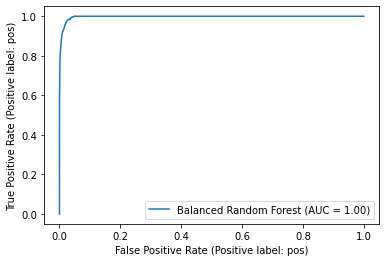

In [168]:
# ROC, AUC
plot_roc_curve(bclf, X_train, y_train, name = 'Balanced Random Forest')

In [169]:
bclf.oob_score_

0.9568333333333333

Now we are going to do the same for the test set.

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


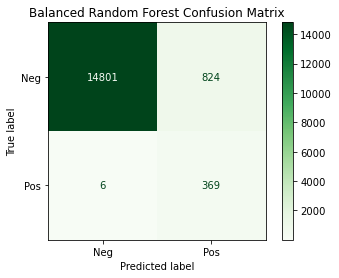

In [170]:
fig3 = plot_confusion_matrix(bclf, X_test, y_test, display_labels=['Neg', 'Pos'], cmap='Greens')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

In [172]:
misrate_test_b = (6+824)/(6+824+14801+369)
print('The misclassification rate for the training data set is: ',misrate_test_b)

The misclassification rate for the training data set is:  0.051875


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


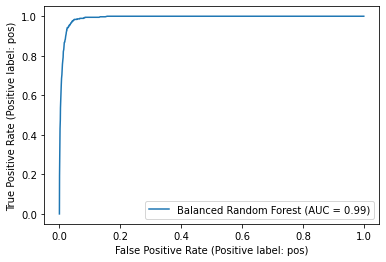

In [173]:
# ROC, AUC
plot_roc_curve(bclf, X_test, y_test, name = 'Balanced Random Forest')

In [175]:
oob_estimate_b =1 - bclf.oob_score_
oob_estimate_b

0.043166666666666687

From the out of bag estimate, which is 0.043, and misclassification error rate for the test set, which is 0.051875, we can see that the out of bag error estimate is lower still.
Compared to part c, we do get a higher oob estimate error. We also have a higher test error after balancing the random forest by sampling.

##### (e) XGBoost and Model Trees

In [187]:
import xgboost as xgb
from xgboost import cv
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [188]:
xgb_model = xgb.XGBClassifier()
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [195]:
test_params = {'alpha':[0, 0.003, 0.006, 0.01],'objective':['binary:logistic']} # alpha is for L1-penalized
model_xgb = GridSearchCV(estimator = xgb_model,param_grid = test_params,cv=5)
# we pick the 5 fold cross validation method
model_xgb.fit(X_train,y_train)
print(model_xgb.best_params_)

{'alpha': 0, 'objective': 'binary:logistic'}


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


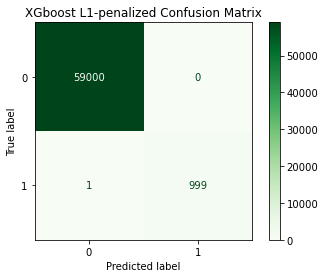

In [202]:
fig3 = plot_confusion_matrix(model_xgb, X_train, y_train, display_labels=[0, 1], cmap='Greens')
plt.title('XGboost L1-penalized Confusion Matrix')
plt.show()

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


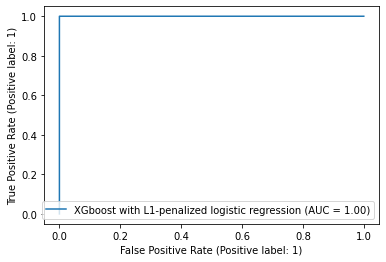

In [201]:
# ROC, AUC
plot_roc_curve(model_xgb, X_train, y_train, name = 'XGboost with L1-penalized logistic regression')

Now we do the same for the test set.

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


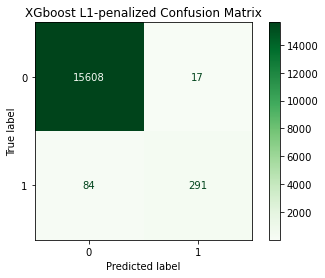

In [203]:
fig3 = plot_confusion_matrix(model_xgb, X_test, y_test, display_labels=[0, 1], cmap='Greens')
plt.title('XGboost L1-penalized Confusion Matrix')
plt.show()

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


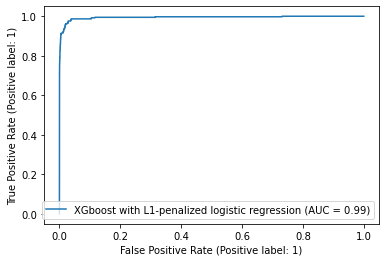

In [199]:
# ROC, AUC
plot_roc_curve(model_xgb, X_test, y_test, name = 'XGboost with L1-penalized logistic regression')

In [205]:
y_pred_xgb = model_xgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.9936875


In [207]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred_xgb)
print('Estimated test error :',MSE)

Estimated test error : 0.0063125


##### (f) SMOTE to pre-process data to compensate class imbalance. Then XGBoost with L1-penalized logistic regression.

In [245]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
# reference: https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

In [246]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', XGBClassifier()]])

In [250]:
param_grid_2 = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [251]:
grid_search_2 = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid_2,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1)

In [252]:
grid_search_2.fit(X_train, y_train)
cv_score = grid_search_2.best_score_
test_score = grid_search_2.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

[22:16:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "C" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:27:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "C" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpyt

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


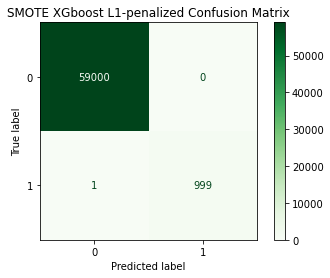

In [253]:
fig6 = plot_confusion_matrix(grid_search_2, X_train, y_train, display_labels=[0, 1], cmap='Greens')
plt.title('SMOTE XGboost L1-penalized Confusion Matrix')
plt.show()

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


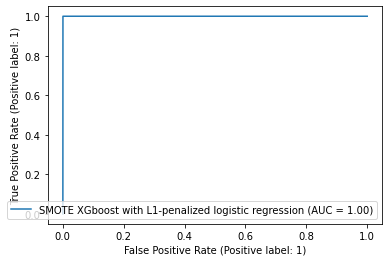

In [254]:
plot_roc_curve(grid_search_2, X_train, y_train, name = 'SMOTE XGboost with L1-penalized logistic regression')

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


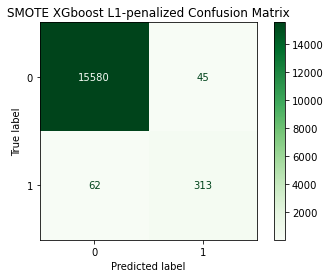

In [255]:
fig8 = plot_confusion_matrix(grid_search_2, X_test, y_test, display_labels=[0, 1], cmap='Greens')
plt.title('SMOTE XGboost L1-penalized Confusion Matrix')
plt.show()

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


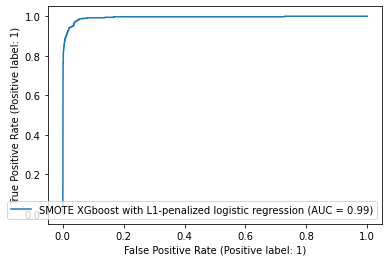

[22:16:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "C" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:27:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "C" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpyt

In [256]:
plot_roc_curve(grid_search_2, X_test, y_test, name = 'SMOTE XGboost with L1-penalized logistic regression')

##### ISLR 6.6.3

(a) iv As we increase s, the training RSS will decrease as the model gets more flexible.

(b) ii Test RSS will decrease at first and then increase as the model gets more flexible.

(c) iii Variance will increase as the model becomes more flexible.

(d) iv Bias will decrease.

(e) v The irreducible error will constant since it has nothing to do with the model.

##### ISLR 6.6.5

(a) (y1 - beta1 * x1 - beta2 * x1)^2 + (y2 - beta1 * x2-beta2 * x2)^2 + lambda * (beta1^2 + beta2^2)

(b) If we take the derivative with respect to beta1 and beta2 and set them to zeros, we can get two equations that lambda * beta1 = x1 * y1 + x2 * y2 + 2 * beta1 * x1 * x2 + 2 * beta2 * x1 * x2 = lambda * beta2. Therefore, beta1 = beta2

(c) (y1 - beta1 * x1 - beta2 * x1)^2 + (y2 - beta1 * x2-beta2 * x2)^2 + lambda * (|beta1| + |beta2|)

(d) Since now there are absolute values in the lasso optimization equation, the derivative with respect to beta1 and beta2 are not necessarily equal to each other, especially when takes a positive value and the other is negative. Vice versa.

##### ISLR 8.4.5

Under the majority vote approach, 6 values are greater than 0.5, 4 values are smaller than 0.5, so it's red.

Under the average probability approach, 0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75 = 4.5. The average score is then 45/10 = 0.45. Since 0.45 is less than 0.5 for P(class is red|X), we say the final classification is green.

##### ISLR 9.7.3
(a) sketch the observations

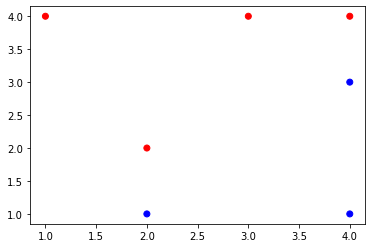

In [221]:
x1 = [3,2,4,1,2,4,4]
x2 = [4,2,4,4,1,3,1]
color =np.array([[255,0,0],[255,0,0],[255,0,0],[255,0,0],[0,0,255],[0,0,255]
                ,[0,0,255]])
#fig_islr = plt.figure()
#sx = fig_islr.add_subplot(11,projection='2d')
plt.scatter(x1,x2,c=color/255.0)
plt.show()

(b) Skectch the optimal separating hyperplane and provide its equation

It's a line that passes through (2,1.5) and (4,3.5). Plug these two points in the equation we get:

x2 = x1 - 0.5 

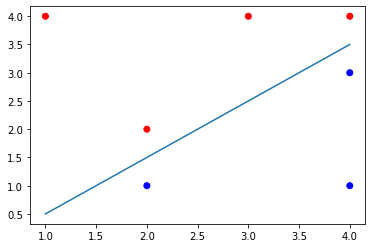

In [226]:
x1_ = np.linspace(1, 4)
x2_ = x1_-0.5
plt.plot(x1_,x2_)
plt.scatter(x1,x2,c=color/255.0)
plt.show()

(c) Classify to red if x1-x2-0.5<0 and classify to blue otherwise.

(d) margin for the maximal margin hyperplane

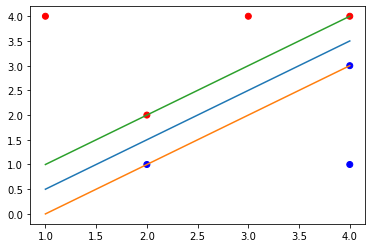

In [230]:
x3_ = x1_ -1
x4_ = x1_
plt.plot(x1_,x2_)
plt.plot(x1_,x3_)
plt.plot(x1_,x4_)
plt.scatter(x1,x2,c=color/255.0)

The margin here is 1/4.

(e) The support vectors are (2,2), (2,1), (4,4), (4,3).

(f) It (4,1) will not affect the movement because it does not lie inside the margin or i.e not a support vector.

(g) skecth a hyperplane that is not the optimal separating hyperplace and its equation.

x2 = x1 - 0.38

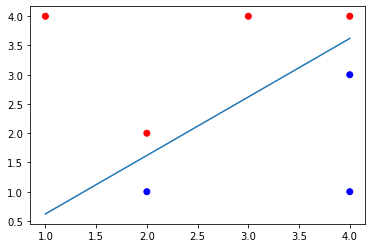

In [231]:
x5_ = x1_ - 0.38
plt.plot(x1_,x5_)
plt.scatter(x1,x2,c=color/255.0)

(h) Draw additional observation so that the two classes are no longer separable by a hyperplane.

Point (3,0) is adede to the plot. The linear hyperplane can not separate these 2 classes observations anymore.

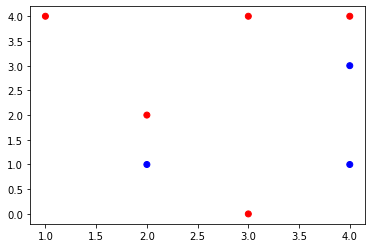

In [232]:
x3 = [3,2,4,1,2,4,4,3]
x4 = [4,2,4,4,1,3,1,0]
color =np.array([[255,0,0],[255,0,0],[255,0,0],[255,0,0],[0,0,255],[0,0,255]
                ,[0,0,255],[255,0,0]])
plt.scatter(x3,x4,c=color/255.0)